Aprendizado Não Supervisionado - CLUSTERING / AGRUPAMENTO

O K-Means é um algoritmo de aprendizado de máquina não supervisionado que agrupa dados em um número k de clusters. O número de clusters é definido pelo usuário e o algoritmo tentará agrupar os dados mesmo que esse número não seja o ideal para o caso específico. Portanto, temos que criar uma técnica que nos ajude a decidir quantos clusters devemos usar para o modelo K-Means.

Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.youtube.com/watch?v=FqIGui0rwh4 (How to Choose the Number of Clusters)

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

https://www.kaggle.com/code/eriveltonguedes/7-clusteriza-o-k-means-erivelton


In [25]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# Vamos utilizar o dataset dados dentro do pacote datasets do sklearn:
from sklearn import datasets

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

Para exemplificar, utilizaremos o "lendário" dataset "dados".

https://en.wikipedia.org/wiki/dados_flower_data_set

https://www.kaggle.com/datasets/arshid/dados-flower-dataset


O conjunto de dados da flor dados é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936.

 Também chamado de conjunto de dados "dados de Anderson" pois Edgar Anderson coletou os dados para quantificar a variação morfológica das flores dados de três espécies relacionadas.

 O conjunto de dados consiste em 50 amostras de cada uma das três espécies de dados (dados Setosa, dados Virginica e dados Versicolor).

 Foram medidas quatro características de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

 Exemplo de Classificação usando o dados Dataset, no canal Programação Dinâmica:
 https://www.youtube.com/watch?v=DeAuVrhKw58


In [27]:
# Convertendo a variável dados em um dicionário Python
dados = pd.read_csv('/content/Mall_Customers.csv')

In [28]:
dados

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
type(dados)

pandas.core.frame.DataFrame

In [30]:
# Visualizando as features:
dados['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [31]:
# Visualizando o target:
dados['Spending Score (1-100)']

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [46]:
df1 = dados.iloc[:, -2:]
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [32]:
# Criamos o dataframe df apenas com as colunas referentes às features:
df = pd.DataFrame(dados['Annual Income (k$)'])
df

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


**Método Elbow**

O método Elbow é uma técnica muito popular e a ideia é executar o agrupamento k-means para um intervalo de clusters k (digamos de 1 a 10) e para cada valor, estamos calculando a soma das distâncias ao quadrado de cada ponto até seu centro atribuído (distorções).

In [47]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df1)
    distorcoes.append(modelo01.inertia_)

# Observação:
# O método "inertia_" permite calcular as distorções, ou seja,
# Soma das distâncias ao quadrado das amostras até o centro do cluster (centroides) mais próximo,
# ponderadas pelos pesos das amostras, se fornecidas

In [48]:
distorcoes

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25372.823780297706,
 21818.114588452176]

Observando a Curva de Elbow

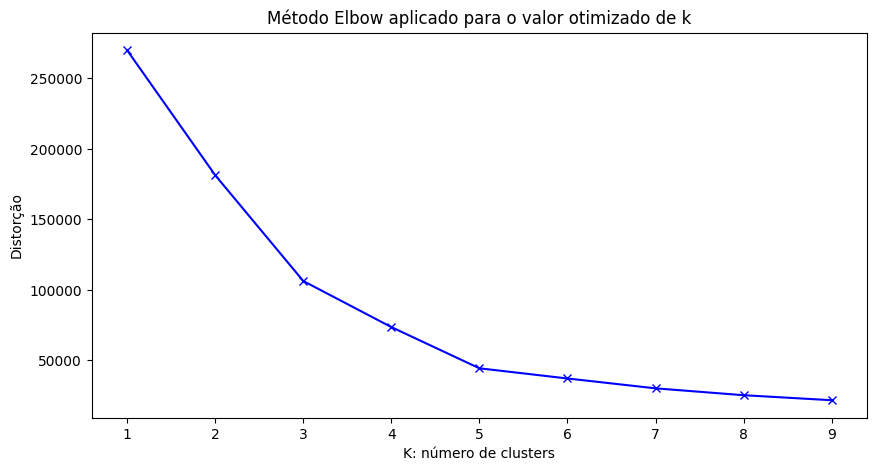

In [49]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [50]:
modelo_KMeans = KMeans(n_clusters=5)
modelo_KMeans.fit(df1)

KMeans(n_clusters=5)

In [52]:
# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
df1['clusters'] =modelo_KMeans.predict(df1)

In [53]:
df1

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [54]:
# Adicionando a coluna "target" com os dados originais do dataset, para podermos comparar...
df1['Spending Score (1-100)'] = dados['Spending Score (1-100)']

In [55]:
df1.head()

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


KeyError: 0

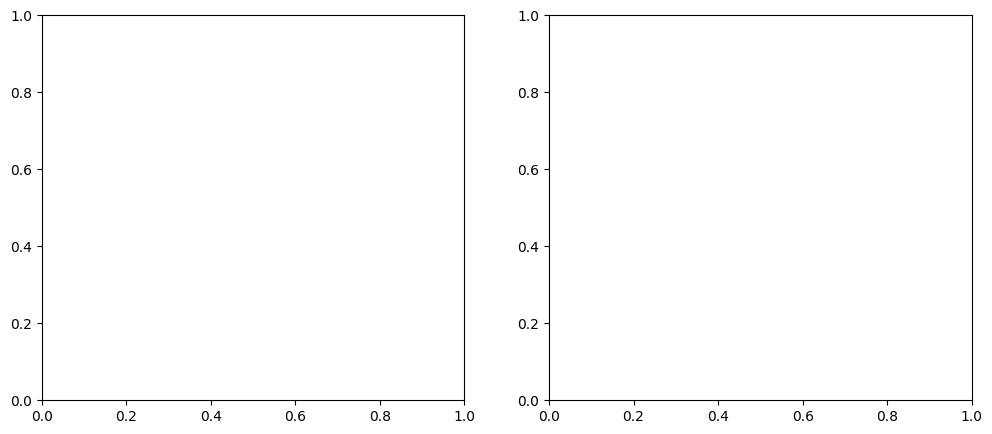

In [56]:
# Comparando graficamente os dados originais e a coluna de clusters criada pelo algoritmo K-Means

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(df1[0], df1[1], c=df1['target'], cmap=plt.cm.Set1)
axes[1].scatter(df1[0], df1[1], c=df1['clusters'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)

Text(0.5, 1.0, 'Clusters criados pelo algoritmo K_Means')

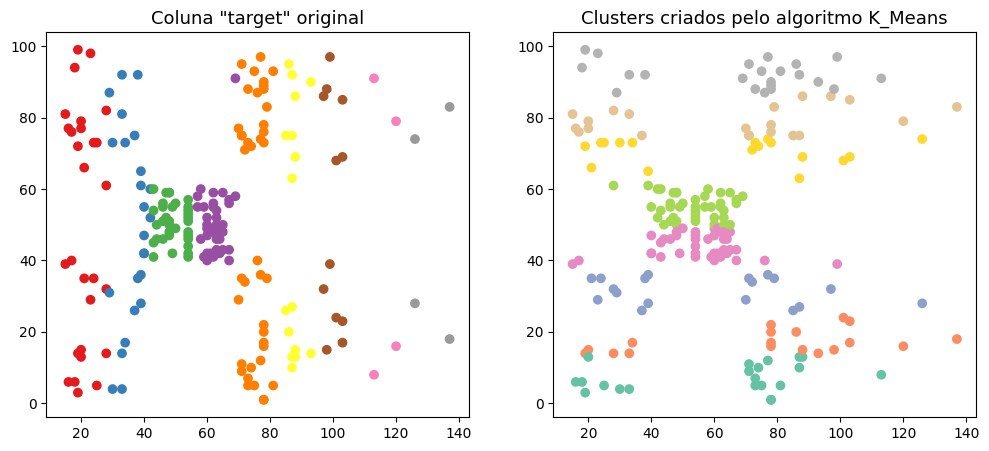

In [57]:
# Assuming the correct column names are 'Annual Income (k$)' and 'Spending Score (1-100)'

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=df1['Annual Income (k$)'], cmap=plt.cm.Set1)
axes[1].scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=df1['Spending Score (1-100)'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)

Avaliação do modelo de Clustering

Silhouette Score é uma ferramenta para avaliar a adequação dos resultados de agrupamento, fornecendo uma medida quantitativa de quão bem definidos e distintos são os agrupamentos.

Fontes de pesquisa:

https://www.educative.io/answers/what-is-silhouette-score

https://en.wikipedia.org/wiki/Silhouette_(clustering)



In [59]:
silhouette = silhouette_score(df1, df1['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.5546


**DESAFIO:**

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo usando o algoritmo K-Means e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.